In [1]:
%load_ext autoreload
%autoreload 2

# ANN Model

I will be building, training and testing an ANN model against the cleaned data.

Target: loan_status

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

# Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
loan = pd.read_csv('data/loan.csv')

In [5]:
loan['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
395214    1
395215    1
395216    1
395217    1
395218    1
Name: loan_status, Length: 395219, dtype: int64

In [6]:
X = loan.drop('loan_status', axis=1)
y = loan['loan_status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
y_train.head()

31406     1
234046    0
381949    1
56044     1
214759    0
Name: loan_status, dtype: int64

In [9]:
X_train.head()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
31406,31472,14000.0,11.47,461.47,37000.0,22.32,16.0,0.0,18442.0,36.0,...,0,0,0,0,0,0,0,0,0,0
234046,234544,3000.0,14.09,69.95,60000.0,27.16,8.0,0.0,13808.0,82.7,...,0,0,0,0,0,1,0,0,0,0
381949,382735,33425.0,17.76,844.42,75000.0,19.18,14.0,0.0,33126.0,64.6,...,0,0,0,0,0,0,0,0,0,0
56044,56145,14000.0,10.15,452.73,60000.0,9.76,10.0,2.0,11367.0,51.0,...,0,0,0,0,0,0,0,0,0,0
214759,215208,20000.0,11.53,659.81,75000.0,11.71,9.0,1.0,6090.0,32.4,...,0,0,0,0,0,0,0,0,0,0


# Data Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Early Stopping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Build 01 - 1 Hidden Layer

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [17]:
X_train.shape

(296414, 164)

In [18]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))

# hidden layer
model.add(Dense(83, activation='relu'))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

## Large Batch Size

In [19]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300


2023-03-02 16:20:54.350068: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1483/1483 [==============================] - 2s 1ms/step - loss: 0.3969 - val_loss: 0.3633
Epoch 2/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3574 - val_loss: 0.3547
Epoch 3/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3222 - val_loss: 0.2878
Epoch 4/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2770 - val_loss: 0.2772
Epoch 5/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2707 - val_loss: 0.2734
Epoch 6/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2684 - val_loss: 0.2731
Epoch 7/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2659 - val_loss: 0.2730
Epoch 8/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2641 - val_loss: 0.2770
Epoch 9/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2624 - val_loss: 0.2760
Epoch 10/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2603 

<Axes: >

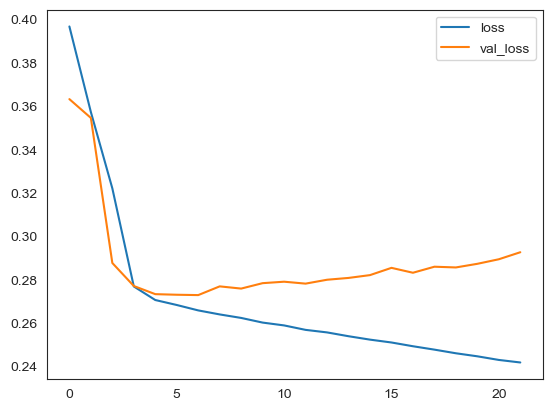

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Small batch size

In [21]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=32,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
9263/9263 [==============================] - 7s 802us/step - loss: 0.2613 - val_loss: 0.2889
Epoch 2/300
9263/9263 [==============================] - 7s 796us/step - loss: 0.2568 - val_loss: 0.2814
Epoch 3/300
9263/9263 [==============================] - 7s 798us/step - loss: 0.2547 - val_loss: 0.2899
Epoch 4/300
9263/9263 [==============================] - 7s 796us/step - loss: 0.2532 - val_loss: 0.2901
Epoch 5/300
9263/9263 [==============================] - 7s 800us/step - loss: 0.2515 - val_loss: 0.2880
Epoch 6/300
9263/9263 [==============================] - 7s 798us/step - loss: 0.2488 - val_loss: 0.2937
Epoch 7/300
9263/9263 [==============================] - 8s 874us/step - loss: 0.2471 - val_loss: 0.2921
Epoch 8/300
9263/9263 [==============================] - 8s 852us/step - loss: 0.2452 - val_loss: 0.2945
Epoch 9/300
9263/9263 [==============================] - 8s 812us/step - loss: 0.2434 - val_loss: 0.2964
Epoch 10/300
9263/9263 [==============================]

<Axes: >

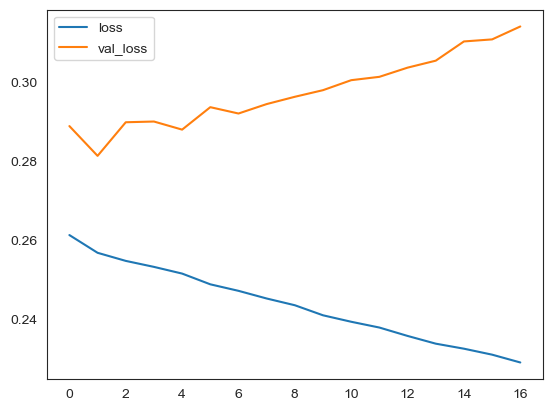

# Build 02 - 2 Hidden Layers

In [28]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))

# hidden layer
model.add(Dense(83, activation='relu'))

# hidden layer
model.add(Dense(20, activation='relu'))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [29]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=32,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
9263/9263 [==============================] - 8s 846us/step - loss: 0.3558 - val_loss: 0.2888
Epoch 2/300
9263/9263 [==============================] - 8s 833us/step - loss: 0.2833 - val_loss: 0.2766
Epoch 3/300
9263/9263 [==============================] - 8s 851us/step - loss: 0.2766 - val_loss: 0.2721
Epoch 4/300
9263/9263 [==============================] - 8s 852us/step - loss: 0.2737 - val_loss: 0.2772
Epoch 5/300
9263/9263 [==============================] - 8s 873us/step - loss: 0.2713 - val_loss: 0.2731
Epoch 6/300
9263/9263 [==============================] - 8s 861us/step - loss: 0.2686 - val_loss: 0.2723
Epoch 7/300
9263/9263 [==============================] - 8s 836us/step - loss: 0.2661 - val_loss: 0.2739
Epoch 8/300
9263/9263 [==============================] - 8s 848us/step - loss: 0.2637 - val_loss: 0.2747
Epoch 9/300
9263/9263 [==============================] - 8s 845us/step - loss: 0.2613 - val_loss: 0.2765
Epoch 10/300
9263/9263 [==============================]

<Axes: >

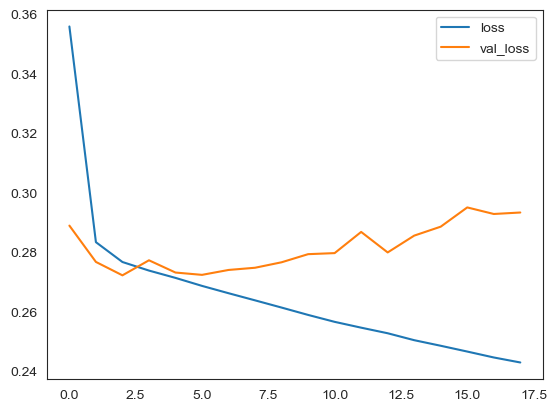

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Adding DropOut()

In [33]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.8))

# hidden layer
model.add(Dense(83, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [34]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
1483/1483 [==============================] - 2s 2ms/step - loss: 0.4476 - val_loss: 0.4085
Epoch 2/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.4069 - val_loss: 0.3729
Epoch 3/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3881 - val_loss: 0.3662
Epoch 4/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3803 - val_loss: 0.3613
Epoch 5/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3774 - val_loss: 0.3594
Epoch 6/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3752 - val_loss: 0.3592
Epoch 7/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3738 - val_loss: 0.3590
Epoch 8/300
1483/1483 [==============================] - 2s 2ms/step - loss: 0.3736 - val_loss: 0.3607
Epoch 9/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3727 - val_loss: 0.3571
Epoch 10/300
1483/1483 [==============================] - 2s 1ms/step - l

# 0.2 Dropout

In [39]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(83, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [40]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.4035 - val_loss: 0.3596
Epoch 2/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3672 - val_loss: 0.3571
Epoch 3/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3605 - val_loss: 0.3531
Epoch 4/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3555 - val_loss: 0.3448
Epoch 5/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3419 - val_loss: 0.3096
Epoch 6/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3011 - val_loss: 0.2778
Epoch 7/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2834 - val_loss: 0.2773
Epoch 8/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2778 - val_loss: 0.2748
Epoch 9/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2755 - val_loss: 0.2748
Epoch 10/300
1158/1158 [==============================] - 2s 2ms/step - l

<Axes: >

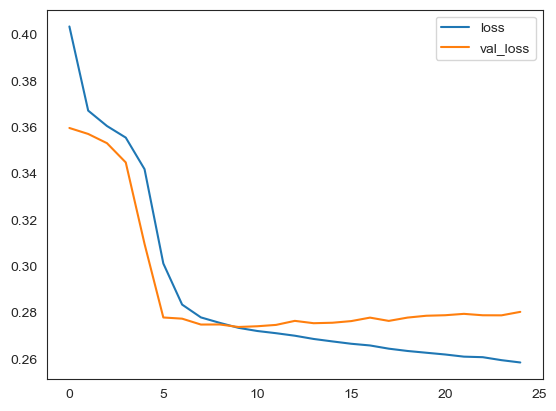

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 0.5 Dropout

In [44]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(83, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [45]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.4376 - val_loss: 0.3873
Epoch 2/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3906 - val_loss: 0.3592
Epoch 3/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3711 - val_loss: 0.3567
Epoch 4/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3669 - val_loss: 0.3563
Epoch 5/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3644 - val_loss: 0.3549
Epoch 6/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3613 - val_loss: 0.3495
Epoch 7/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3515 - val_loss: 0.3296
Epoch 8/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3389 - val_loss: 0.3213
Epoch 9/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3302 - val_loss: 0.3042
Epoch 10/300
1158/1158 [==============================] - 2s 2ms/step - l

<Axes: >

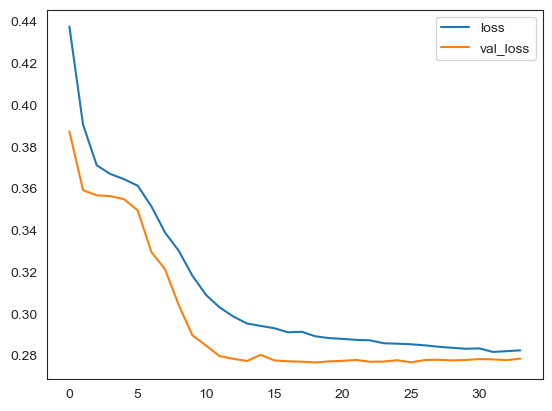

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [58]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3088/3088 [==============================] - 1s 304us/step


# Performance Evaluation

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     19428
           1       0.88      1.00      0.93     79377

    accuracy                           0.89     98805
   macro avg       0.94      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



# Saving Model

In [60]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('model.h5')